# Getting started
Welcome to this first, tutorial style, assignment.
This is assignment is intented to help you exploring the basics of how to work with Numpy as well as TensorFlow. 
If you have chosen to use PyTorch instead of Tensorflow you need to replace all tensorflow related parts with equivalent Torch code, which should not be a problem, but will obviously require extra effort, at least in this tutorial exercise. The official guides on the web will help you with it.

We start with importing Numpy and TensorFlow. 
The notation `import .. as np/tf` here refers to the fact that we access Numpy/TF functionality through as `np.<func>` and `tf.<func>` respectively.
This is to avoid naming conflicts and its widely accepted convention to use `np` for numpy, `tf` for tensorflow, `plt` for matplotlib.pyplot, etc.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as K

## Polynomial Example 

Let us start by creating some data with Numpy and define a polynomial function. 
We will do so in Numpy first, and then, second, you repeat the same in TF. 
Most operations are available through by both frameworks, we will see the necessity for it later.
The numpy part is completely ready, so the task here is to mainly read and understand the code. 
You could use the debug feature to go through the code step by step, or use print to see intermediate results.

Shape of variably x is (200,), coefficients are [-1.   -1.    0.5  -0.04]
Shape of output y is (200,)


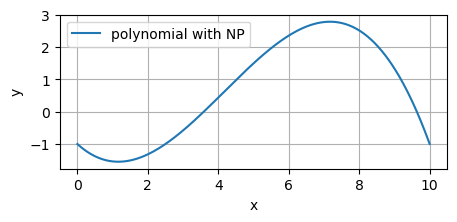

In [71]:
# a common python variable, here to specify how many samples we put in our "dataset"
samples = 200

# let's generate an input "dataset" which in this case is just a vector of consecutive numbers 
x_np = np.linspace(0,10,samples)

# let's also specify some more or less arbitrarily chosen coefficients for a polynomial
a_np = np.array( [ -1, -1, 0.5, -4e-2])

# Report on the data we just created, using a fancy formatted string (starting with f")
print( f"Shape of variably x is {x_np.shape}, coefficients are {a_np}" ) # tells the shape of a numpy array

# This is how one defines a function in python
# the intendation is mandatory and specifies which lines are part of the function 
def poly_np(x, a):
    X = np.ones( [len(x), len(a)] ) # preallocating arrays makes sense in numpy, you can use np.empty, np.zeros, or np.ones for it

    for i in range(1, len(a)):  # this is one way of doing a for. `i` will be ranging from 1 to 3  (len(a)-1)
        X[:,i] = x**i
    
    y = X.dot(a) #this is a matrix/vector product in numpy

    return y

    # btw. python can very compact, the same could be achieved with this one-liner for-loop :
    # return np.sum( a[0] + [a[i]*np.power(x,i) for i in range(1, len(a))], axis=0)

# then execute the function
y_np = poly_np(x_np, a_np)

print( f'Shape of output y is {y_np.shape}' ) # reports the shape of a numpy array

# here we plot the polynomial in matplotlib
plt.figure(figsize=[5,2])
plt.plot(x_np, y_np, label="polynomial with NP")
plt.xlabel('x'), plt.ylabel('y')
plt.legend() # we could specify labels here, but I attateced it with the plot instruction right away
plt.grid()
plt.show()


Now, redo the same thing using only TensorFlow instructions - your initiative is expected from now on whenever there is a TODO.
The comments will still guide you.

x_tf is a column vector with shape (200, 1)
a_tf is a column vector with shape (4, 1)
Calling the function:
Results of Numpy/TF method match: True


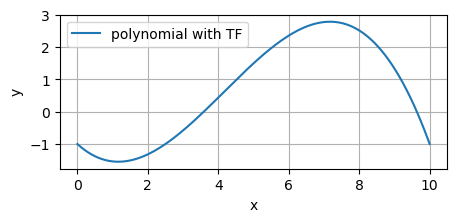

In [72]:
x_tf = tf.convert_to_tensor(x_np) # this explicitly converts the numpy type to tf tensor
a_tf = tf.convert_to_tensor(a_np)

# adding a second dimension to the matrix. 
# Many np/TF functions are extremly pickey about dimensions, though there are some broadcasting rules.
x_tf = x_tf[:,tf.newaxis] 
a_tf = a_tf[:,tf.newaxis]
print(f"x_tf is a column vector with shape {x_tf.shape}")
print(f"a_tf is a column vector with shape {a_tf.shape}")

# Next, we define our own function
@tf.function # <- this is a function decorator, uncommented for now, well explore its use later
def poly_tf(x, a):

    # TF has slightly different API than Numpy thus things sometimes work similarly or different
    # Our plan is to implement something like  [x, x, x, x]^[0,1,2,3] * [a0; a1; a2; a3],  using matrix/vector operation.

    n = a.get_shape()[0]

    # TODO: First expand x into the second dimension (axis=1) such that X=[x, x, x, x] using the tf.repeat function, 
    X =  tf.repeat(x_tf, n, 1)
    
    # TODO: Next create a vector of the exponents using tf.range(). 
    # You will need to match the data-type of X by passing dtype=X.dtype as an additional argument.
    # Otherwise TF will be quite unhappy in the next step...
    p =  tf.range(0, n, dtype=X.dtype)
    

    # TODO: Next use tf.pow() to raises individual columns in X to the powers specified in p
    X =  tf.pow(X, p)
    
    # TODO: Multiply the powers in X with our coefficients a. 
    # X*a will not work (is elementwise), so you need to use a different multiplication function... 
    y = tf.tensordot(X, a, 1)
    
    #print("debug msg") # ignore this line for now
    return  y

print("Calling the function:")
# TODO: 
y_tf = poly_tf(x_tf, a_tf)

# Checking for correct result, if above function is written properly then this returns True
print(f"Results of Numpy/TF method match: {np.allclose(y_np.flatten(), y_tf.numpy().flatten())}" )


# here we plot the output of our function. 
plt.figure(figsize=[5,2])
plt.xlabel('x'), plt.ylabel('y'), plt.grid()
plt.plot(x_tf.numpy(), y_tf.numpy(), label="polynomial with TF")
plt.legend()
plt.show()

Let's now measure the time that the operation takes

In [73]:
from timeit import timeit # importing a function from a package with same name

# this executes the poly function 50 times and measures the time
# lambda thereby defines an inline anonymous function handle
ex_speed = timeit(lambda: poly_tf(x_tf, a_tf), number=50)/50 

print( f'Average time for a single execution: {(ex_speed*1e3):.3f} ms' ) # tells the shape of a numpy array

Average time for a single execution: 0.436 ms


Quite slow, right? That's because TF is doing things in "eager" mode here. 

Find and uncomment the `@tf.function` decorator in the above code and re-run the script.
You'll see quite a significant speedup. \
Report your measurements. 

The code has now been converted into a static computation graph, which executes much faster. 
The Numpy function is still much faster in this case, but that is because our graph here is really simple. \
This will change for more complex graphs. The extra overhead in handling the graph is dominating our execution time here. \
TF functions do a lot under the hood, providing features such as e.g. automated symbolic differentiation (-> using gradient tape).

Beware of certain limitations when operating with a graph. A graph will e.g. unroll any loops, you cannot do recursion, and usually cannot include any non-TF operations. 

If you uncomment the print debug statement in the function above, without graph mode, it will be printed 100 times when measureing the time. 
In graph mode, it will be printed out just in the first call, i.e. when the graph is initially constructed (see output of the cell above, the process is called "tracing"), and then never again.
You can, however, replace the `print` with the `tf.print` function and it will become part of the compute graph.


When later defining actual NN models, your model will be converted into a graph automatically, so you mostly do not need to take care of this yourself. It is however important to be aware of the concept. 


### Use TensorFlow to train a regression model and identify the coefficients.
Let's assume that we forgot the coefficients somehow and need to identify those through polynomial regression

And we will let TF/Keras do the job for us.

In [93]:
# Use the code from above to construct the regressor matrix X, however, without the first column with just "ones"

# TODO: you can do it in tensorflow or numpy, just try to get the matrix here. 
# make sure we have X as a TF tensor in the end and it has shape property is (1000, 3) 
# X = ...

n = a_tf.get_shape()[0]
X =  tf.repeat(x_tf, n-1, 1)
p =  tf.range(1, n, dtype=X.dtype)
X =  tf.pow(X, p)

# Input data scaling
X_avg = tf.math.reduce_mean(X)
X_std = tf.math.reduce_std(X)
X = (X - X_avg)/X_std

# also copy the output
Y = y_tf

# Output data scaling
Y_avg = tf.math.reduce_mean(Y)
Y_std = tf.math.reduce_std(Y)
Y = (Y - Y_avg)/Y_std

# this will throw an error if the expected shapes are not matched
try:
    assert(X.shape == (samples, 3) ) 
    assert(Y.shape == (samples, 1) )
except:
    print("Dims aren't as expected!")

In [100]:
# let's define a model with one input layer and one output layer.

# For the input layer we need to define the shape of our feature dimensions
input_layer = K.Input( shape=(3,), name="input_layer" ) # this will have "shape=(3,)" which basically is a tuple with just one element

# For the output layer, we want to use a single neuron. 
# Instead of writing this on our own, let's simply use a dense layer with a size 1
# TODO: add the respecitve dense layer from the available layers in Keras (K.layers) here. You could also pass it a name= argument
# output_layer = 

# Don't forget to also connect the input layer with the newly created dense layer
# Therefore we need to initialize our layer by simply calling it and passing the input layer as an argument.
# this can be done in a single line:
# next_layer = NewLayer(<layer specs>)(previous_layer)
output_layer = K.layers.Dense(1)(input_layer)

# TODO: next we use our input_layer and output layer to define a Keras model
model = K.Model(inputs=input_layer, outputs=output_layer)

# TODO: investigate the model by calling it's summary() function. 
model.summary()

# examine the number of coefficients that our small model has.
# Also note the first dimension being "None". That's because we didn't specify the batch size yet

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_12 (Dense)            (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


Callback setup:

In [101]:
weights_hist = [] # we use this python list to append the watched weights.
bias_hist = [] # we use this other list, to append the watched bias.

# beware, rerunning this part of code/cell, will always clear your weights_hist/bias_hist, if there was anything in there.
# TODO: you might want to move this definition, as well as the class, to some point be before your fit call. 

class WatchWeightsCallback(K.callbacks.Callback): # this class inherits all functinality from the base class 
    # If you check the doc on the Callback class you'll see there are several predefined methods which are called by the fit method at different times. 
    def __init__(self, *args, **kwargs): # this init function is the constructor, we don't need to modify it for this purpose.
        super(WatchWeightsCallback, self).__init__(*args, **kwargs)

    # We want to override the method that is called at the end of each epoch, to extract the weights from the model. 
    # TODO: find and add the correct function 
    def on_epoch_end(self, epoch, logs=None):
        # the model can be accessed from inside the callback using self.model
        a = self.model.layers[1].weights[0].numpy()
        b = self.model.layers[1].weights[1].numpy()  
        weights_hist.append([a])
        bias_hist.append([b])

# we can now pass this callback to the models fit function (e.g. above)
# remember to reinitialize the model before doing this, otherwise, you start your recording with the already trained weights. 
# model.fit(x= , y= , batch_size=, epochs=, callbacks=[WatchWeightsCallback(),])

Next we obviously want to train this structure to learn the coefficients. 
For keeping things simple we simply call the models "fit" function, which will do the job. 

However, before we can really do so we also need to compile the model
Compiling here means mainly, assigning an optimizer (e.g. SGD), and a loss function. 

In [102]:
# TODO:  
# find the necessary pieces from the TF docs and pick an appropriate loss function for the regression task.

model.compile( optimizer=K.optimizers.Adam(learning_rate=0.1) , loss=K.losses.MeanSquaredError() )
hist = model.fit(x=X, y=Y, batch_size=10, epochs=200, callbacks=[WatchWeightsCallback(),])


Epoch 1/200
20/20 [==============================] - 0s 1ms/step - loss: 1.2718
Epoch 2/200
20/20 [==============================] - 0s 930us/step - loss: 0.8252
Epoch 3/200
20/20 [==============================] - 0s 836us/step - loss: 0.8335
Epoch 4/200
20/20 [==============================] - 0s 331us/step - loss: 0.7647
Epoch 5/200
20/20 [==============================] - 0s 950us/step - loss: 0.7530
Epoch 6/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7687
Epoch 7/200
20/20 [==============================] - 0s 856us/step - loss: 0.7336
Epoch 8/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7472
Epoch 9/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7233
Epoch 10/200
20/20 [==============================] - 0s 1ms/step - loss: 0.7280
Epoch 11/200
20/20 [==============================] - 0s 752us/step - loss: 0.7271
Epoch 12/200
20/20 [==============================] - 0s 489us/step - loss: 0.7197
Epoch 13/200
20/20 [===

...only getting nan's and inf? MSE loss not as expected?
- maybe a good time to go back and rescale the input and output data (reduce_max, reduce_std)
- then, tune the learning rate, epochs, batch size 
- (the default learning rate is likely not going to work here, and you will also need much more than just 10 epochs)
- investigating the loss convergence curve (check below!) will help you to tune the optimization 
- you can also try different optimizers (though every one of them can do the job here)
- sometimes it is also helpful to visualize the output of the model

Report your experience, which setting(s) worked for you and provide the loss graph.

IMPORTANT: your trained weights are stored inside the model! \
you need to rerun the entire model definition above to reinitialize the coefficients, if you want to retrain.


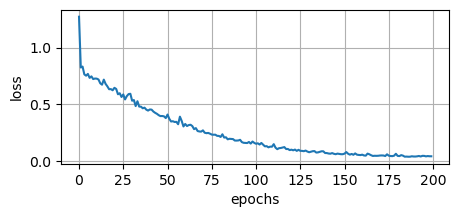

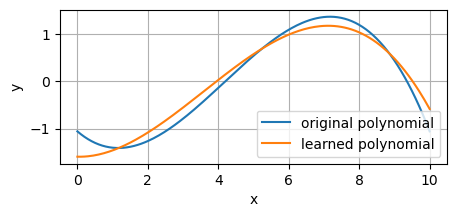

In [103]:
# the fit function also returns a history object. 
# This is one of your most useful tools to debug the learning/convergence.
# TODO: capture the return value of fit to visualize the convergence
try:
    plt.figure(figsize=[5,2])
    plt.plot(hist.history["loss"])
    plt.xlabel("epochs"), plt.ylabel("loss"), plt.grid()
    plt.show()
except:
    print("Error while plotting loss, hist object not assigned?")


# TODO: apply the models predict function to retrieve the output. 
Y_pred = model.predict(X, verbose=0)

# let's see the output of our function. 
try:
    plt.figure(figsize=[5,2])
    plt.plot(x_np, Y, label="original polynomial")
    plt.plot(x_np, Y_pred, label="learned polynomial")
    plt.xlabel('x'), plt.ylabel('y'), plt.legend(), plt.grid()
    plt.show()
except:
    print("Error while plotting model output, missing Y or Y_pred")

Once successful, we can extract the coefficients from the model using the model's get_weights method:\
Check how they compare to your the original coefficients.
Remember that you probably applied some scaling. \
Report the derived coefficients, considering the scaling, and the associated MSE

In [106]:
print(f"Target coefficients {a_np}")
print(f"Learned coefficients: {np.concatenate((model.layers[1].get_weights()[1], np.ndarray.flatten(model.layers[1].get_weights()[0])))*Y_std.numpy()+Y_avg.numpy()}")
# TODO: get the weights

Target coefficients [-1.   -1.    0.5  -0.04]
Learned coefficients: [18.248121  -5.844748  53.444035  -4.2414246]


While the training loop is currently hidden behind keras' fit function, we can link certain functions, called "callback" into the training loop.  
Let us setup a callback that saves the weights after each epoch, so we can visualize them afterwards. 

There are a number of callbacks already defined in tf, but there's none for this purpose. \
...then we need to sit down and write our own callback. 

It is quite often that certain specific functionality is not made available through a convenient function. \
Then you need to use the respective TF base-class and customize it to your needs. \
Tensorflow is built to be extended with custom functionality so no need to be worried to make use of it. \
Typical examples are: a custom loss function or metric, a custom layer, a custom callback, etc.

The TF doc's usually specify what functionality is there in the base class and how it needs to be modified. 

In [10]:
# The code was moved above the fit call.

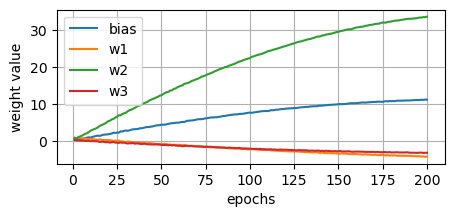

In [108]:
# reconvert the lists with the watched weights into pure numpy array plotting
# and reshpae to get the dimensions right.
bias_hist_np = np.array(bias_hist).reshape(-1,1)
weights_hist_np = np.array(weights_hist).reshape(-1,3)
n_epochs = bias_hist_np.shape[0]

# TODO: add the visualization of the weight history here!
plt.figure(figsize=(5,2))
plt.plot(range(1, n_epochs+1), bias_hist_np, label="bias")
for i in range(0, weights_hist_np.shape[1]) :
    plt.plot(range(1, n_epochs+1), weights_hist_np[:,i], label="w"+str(i+1))
plt.xlabel('epochs'), plt.ylabel('weight value'), plt.legend(), plt.grid()
plt.show()

### Use a NN Instead of Polynomial Regression
That did not work too well, right?
Gradient algorithms are very subsceptible to improper scaling and high correllation of input features.
Both was the case in the previous example.

Let us approach it more in the NN way now. 

Task:
- Define an input layer with just one input "feature". Our input data will be just the linear x then, and the output is again y (still with proper scaling...).
- Define a fully connected hidden layer with nonlinear activation. 
- Define a linear output layer. 

Train the model as we did before. Monitor the convergence via plotting the loss.
Vary the size of the hidden layer, vary the activation function, and try using more than one hidden layer.  

Document what worked well/ did not work and describe your insights. 
Visualize (few data-points are sufficient!) how the accuracy evolves with the number of neurons/coefficients for selected cases with different activation functions or number of consecutive layers. 

What is your take-away after this?

Model: "model_145"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 dense_399 (Dense)           (None, 5)                 10        
                                                                 
 dense_400 (Dense)           (None, 5)                 30        
                                                                 
 dense_401 (Dense)           (None, 5)                 30        
                                                                 
 dense_402 (Dense)           (None, 5)                 30        
                                                                 
 dense_403 (Dense)           (None, 1)                 6         
                                                                 
Total params: 106
Trainable params: 106
Non-trainable par

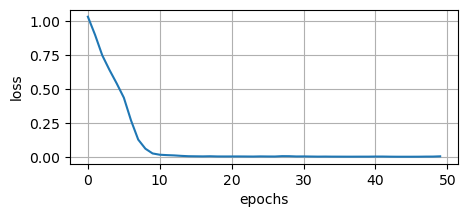

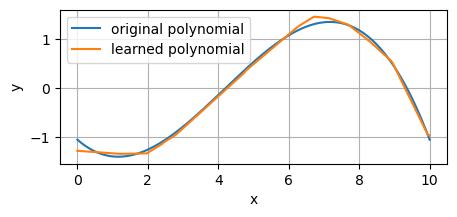

In [241]:
# TODO:
x_tf_avg = tf.math.reduce_mean(x_tf)
x_tf_std = tf.math.reduce_std(x_tf)
x_tf_scaled = (x_tf - x_tf_avg)/x_tf_std

# Y is already scaled

n_hidden = 5

input_layer = K.Input( shape=(1,), name="input_layer" )
hidden_layer_1 = K.layers.Dense(n_hidden, activation=K.activations.relu)(input_layer)
hidden_layer_2 = K.layers.Dense(n_hidden, activation=K.activations.relu)(hidden_layer_1)
hidden_layer_3 = K.layers.Dense(n_hidden, activation=K.activations.relu)(hidden_layer_2)
hidden_layer_4 = K.layers.Dense(n_hidden, activation=K.activations.relu)(hidden_layer_3)
hidden_layer_5 = K.layers.Dense(n_hidden, activation=K.activations.relu)(hidden_layer_4)
output_layer = K.layers.Dense(1)(hidden_layer_5)
model = K.Model(inputs=input_layer, outputs=output_layer)
model.summary()

model.compile( optimizer=K.optimizers.Adam(learning_rate=0.01) , loss=K.losses.MeanSquaredError() )
hist = model.fit(x=x_tf_scaled, y=Y, batch_size=10, epochs=50)

try:
    plt.figure(figsize=[5,2])
    plt.plot(hist.history["loss"])
    plt.xlabel("epochs"), plt.ylabel("loss"), plt.grid()
    plt.show()
except:
    print("Error while plotting loss, hist object not assigned?")


# TODO: apply the models predict function to retrieve the output. 
Y_pred = model.predict(x_tf_scaled, verbose=0)

# let's see the output of our function. 
try:
    plt.figure(figsize=[5,2])
    plt.plot(x_np, Y, label="original polynomial")
    plt.plot(x_np, Y_pred, label="learned polynomial")
    plt.xlabel('x'), plt.ylabel('y'), plt.legend(), plt.grid()
    plt.show()
except:
    print("Error while plotting model output, missing Y or Y_pred")